In this notebook, I scrape and visualize data from videos posted to Mr. Beast's YouTube channel. For those unfamiliar with Mr. Beast, I highly recommend his videos. I would describe him as Gen Z Oprah Winfrey on steroids. Link: https://www.youtube.com/channel/UCX6OQ3DkcsbYNE6H8uQQuVA

In [1]:
import re

In [2]:
import pandas as pd

In [3]:
import urllib.request, urllib.error, urllib.parse

In [4]:
import time

To use, go to the desired YouTube channel's videos tab, scroll all the way down, copy html code starting from the following line: `<div id="items" class="style-scope ytd-grid-renderer">`" into a .txt file and upload to collab. 

I found that it was more complicated than it was worth to create a script that scrolls all the way down on the webpage automatically and then grabs the html code. This could be an improvement to make if I would like to gather data from a very large amount of channels. For now, it is simple enough to scroll down manually, ctrl-f in inspect element and with the specified line highlighted, hit ctrl-c and ctrl-v into a text file and upload.

In [5]:
#html_code = open("mrbeasthtml.txt", "r")
#code = html_code.read()

In [6]:
#get titles
#titles = re.findall('<a id=\"video-title\".*? aria-label=\"((?:.|\n)*?) by', code)

#clean up titles
#for i in range(len(titles)):
#  titles[i] = re.sub("&amp;","&", titles[i])
#  titles[i] = re.sub("&quot;",'"', titles[i])
#  titles[i] = re.sub(r"\\","", titles[i])

#print(len(titles))

In [7]:
#get urls
#urls = re.findall('rel=.*href=.*(\/watch\?v=[&-_a-zA-Z0-9]*)', code)
#for i in range(len(urls)):
#  urls[i] = 'https://www.youtube.com' + urls[i] #convert to absolute link
#print(len(urls))

In [8]:
#urls[454]

In [9]:
#make sure we can see the code for one video given the url before we iterate through all of them
#response = urllib.request.urlopen(urls[0])
#webContent = response.read()
#print(webContent)

Now that we have the urls for each video on the channel, we can go through each one and get likes, dislikes, upload date, family friendly designation and category for each each video by making a request for and searching through the html code for each video's page. Since there are a lot of requests being made, I throttled the rate to one request every 4 seconds and put a 15 minute cool down for every 500 requests made. I am not sure if these are optimal parameters, but I felt that they were reasonable and that I wasn't in enough of a hurry to worry about optimizing them. This is definitely an area to fix if I would like to scale up this process.

In [10]:
#likes = []
#dislikes = []
#upload_dates = []
#family_friendly = []
#categories = []
#count = 0
#iterate through urls and get likes and dislikes from each video's page
#for url in urls:
#  if count % 500 == 0 and count != 0: #15 minute cool down every 500 requests
#    time.sleep(900)
#  try:
#   time.sleep(4) #wait 5 seconds as to not provide too many requests to the website
#   response = urllib.request.urlopen(url)
#   webContent = response.read()
#
#   match_likes = re.search("\"toggledText\".*?([,0-9]*?) likes", str(webContent)) #likes
#   like_count = match_likes.group(1)
#
#   match_dislikes = re.search("\"iconType\":\"DISLIKE\".*?([,0-9]*?) dislikes", str(webContent)) #dislikes
#   dislike_count = match_dislikes.group(1)
#
#   match_date = re.search("uploadDate\" content=\"(.*?)\"", str(webContent)) #upload date
#   upload_date = match_date.group(1)
#
#   match_family_friendly = re.search("isFamilyFriendly\" content=\"(.*?)\"", str(webContent)) #family friendly designation
#   is_family_friendly = match_family_friendly.group(1)
#
#   match_category = re.search("genre\" content=\"(.*?)\"", str(webContent)) #category
#   category = match_category.group(1)
#
#   likes.append(like_count)
#   dislikes.append(dislike_count)
#   upload_dates.append(upload_date)
#   family_friendly.append(is_family_friendly)
#   categories.append(category)
#   
#   count += 1
#   print(count)
#  except:
#    likes.append("N/A")
#    dislikes.append("N/A")
#    upload_dates.append("N/A")
#    family_friendly.append("N/A")
#    categories.append("N/A")
#    count += 1
#    print("failure")

As we can see, there were 7 requests that failed. I don't see this as too big of an issues since we had a 99% success rate. For those urls I will just drop them from the dataset (I noticed that likes and dislikes were disabled on these videos, so we won't be able to recover that data)

In [11]:
#for i in range(len(categories)): #clean up categories as I did with titles
#  categories[i] = re.sub("&amp;","&", categories[i])
#  categories[i] = re.sub("&quot;",'"', categories[i])
#  categories[i] = re.sub(r"\\","", categories[i])

In [12]:
#get view counts
#views = re.findall('by.* ([0-9,]{1,}) views', code) #operating under the assumption that each video has more than 1 view
#print(len(views))

In [13]:
#get time since post
#times = re.findall('([0-9]{1,}\ (?:week|day|hour|month|year)[s]{0,1}\ ago)<', code)
#print(len(times))

In [14]:
#get video duration
#duration = re.findall('by.*? ago (.*) [0-9,]{1,} views', code) #operating under the assumption that videos are longer than 59 seconds
#print(len(duration))

In [15]:
#create initial dataframe
#d = {'URL': urls, 'Title': titles, 'Upload Date' : upload_dates, 'Time Since Post': times, 'Views': views, 'Duration': duration, 'Likes' : likes, 'Dislikes' : dislikes, 'Is Family Friendly' : family_friendly, 'Category' : categories}
#df = pd.DataFrame(data=d)
#df

In [16]:
#df['Video Number'] = range(len(df.index), 0, -1) #add video number column before deleting anything
#delete_rows = df[df['Upload Date'] == 'N/A'].index
#df = df.drop(delete_rows)
#df.reset_index(drop=True, inplace=True)
#df

Initial ideas for exploration of data:

*   **Add the following column(s):** title length, like to dislike ratio
*   **Reformat the following column(s):** *Duration* -> separate minutes and seconds
*   **Create following plots:** title length over time, likes over time, dislikes over time, views over time, histogram for views, histogram for title length, videos uploaded over time, pie chart for family friendly, bar plot for category



In [17]:
#split 'Duration' column into minutes and seconds and clean up
#df[['Minutes','Seconds']] = df.Duration.str.split(',',expand=True)
#df['Minutes'] = df['Minutes'].str.slice(stop=-8)
#df['Seconds'] = df['Seconds'].fillna('0 seconds') #fill empty values
#df['Seconds'] = df['Seconds'].str.slice(stop=-8)
#df = df.drop(columns=['Duration'])

In [18]:
#df

In [19]:
#df['Time Since Post'] = df['Time Since Post'].replace(['1 day ago', '2 days ago', '3 days ago', '4 days ago', '5 days ago', '6 days ago', '1 week ago', '2 weeks ago',
#                                                       '3 weeks ago', '4 weeks ago'], 'this month') #bucketize Time Since Post
#df['Title Length'] = df['Title'].str.len() #add title length column
#df

As we can see above, there are some columns I need to convert to contain numeric values before creating plots

In [20]:
#df['Views'] = df['Views'].apply(lambda x: x.replace(',', ''))
#df['Likes'] = df['Likes'].apply(lambda x: x.replace(',', ''))

In [21]:
#df['Dislikes'] = df['Dislikes'].replace(',','', regex=True)

In [22]:
#df['Views'] = pd.to_numeric(df['Views'])
#df['Likes'] = pd.to_numeric(df['Likes'])
#df['Dislikes'] = pd.to_numeric(df['Dislikes'])
#df['Seconds'] = df['Seconds'].replace(' ','0', regex=True)
#df['Seconds'] = pd.to_numeric(df['Seconds'])
#df['Minutes'] = pd.to_numeric(df['Minutes'])
#df['Minutes'] = df['Minutes'].fillna(0)

Now that likes and dislikes are numeric, I can finally divide the two columns to get the final column in my dataframe

In [23]:
#df['Like to Dislike Ratio'] = df['Likes'] / df['Dislikes']

We can now save the dataframe we have built up so that we can load it in later and not have to wait for all of the data to be collected

In [24]:
#print(df.info())
#df
#df.to_csv('mrbeastdata.csv')  #save table

In [25]:
#LOAD DATAFRAME HERE
df = pd.read_csv('mrbeastdata.csv')
dropped = df.pop('Unnamed: 0')

I just realized that Upload Date should be reformatted to datetime format for easier plotting

In [26]:
from datetime import datetime

In [27]:
upload_dates_datetime = [] #upload_dates in datetime format for plotting
for date in df['Upload Date'].to_numpy():
  formatted = datetime.strptime(str(date), "%Y-%m-%d")
  upload_dates_datetime.append(formatted)

df['Upload Date'] = upload_dates_datetime

In [28]:
df

,URL,Title,Upload Date,Time Since Post,Views,Likes,Dislikes,Is Family Friendly,Category,Video Number,Minutes,Seconds,Title Length,Like to Dislike Ratio,Title Length Binned,Minutes Binned
0,https://www.youtube.com/watch?v=5Fg9oZk-5uA,I Bought Everything In 5 Stores,2021-01-09,21 hours ago,16801812,2113757,11655,True,Entertainment,700,14.0,14,31,181.360532,"(30, 40]","(10.0, 20.0]"
1,https://www.youtube.com/watch?v=PKtnafFtfEo,"Youtube Rewind 2020, Thank God It's Over",2021-01-01,this month,33441532,3882527,54269,True,Entertainment,699,6.0,31,40,71.542262,"(30, 40]","(0.0, 10.0]"
2,https://www.youtube.com/watch?v=f0c7pSCoZqE,"I Put 1,000,000 Christmas Lights On A House (W...",2020-12-23,this month,31128616,1660977,24464,True,Entertainment,698,12.0,28,58,67.894743,"(50, 60]","(10.0, 20.0]"
3,https://www.youtube.com/watch?v=dg2Ag3e8W-Q,I Opened A Restaurant That Pays You To Eat At It,2020-12-19,this month,35164317,2236092,21927,True,Entertainment,697,10.0,39,48,101.978930,"(40, 50]","(0.0, 10.0]"
4,https://www.youtube.com/watch?v=LeYsRMZFUq0,"I Gave People $1,000,000 But ONLY 1 Minute To ...",2020-12-15,this month,41440467,2776967,29114,True,Entertainment,696,14.0,18,55,95.382531,"(50, 60]","(10.0, 20.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,https://www.youtube.com/watch?v=M82VAcabSiA,Scary minecraft pig skin!,2013-01-13,7 years ago,185816,7638,138,True,Gaming,6,29.0,0,25,55.347826,"(20, 30]","(20.0, 30.0]"
689,https://www.youtube.com/watch?v=7qj3nuF9Dzw,Most Epic minecraft skin EVER (Psy),2013-01-12,7 years ago,206689,8608,255,True,Gaming,5,30.0,0,36,33.756863,"(30, 40]","(20.0, 30.0]"
690,https://www.youtube.com/watch?v=Y74b7WlcEpk,More birds IN MINECRAFT!!,2013-01-12,7 years ago,254993,10624,159,True,Gaming,4,2.0,6,25,66.817610,"(20, 30]","(0.0, 10.0]"
691,https://www.youtube.com/watch?v=Z8nEEdXTaX0,Boxy item mod Minecraft. EPIC,2013-01-12,7 years ago,273357,12150,177,True,Gaming,3,0.0,30,30,68.644068,"(20, 30]",NaN


In [29]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Upload Date')

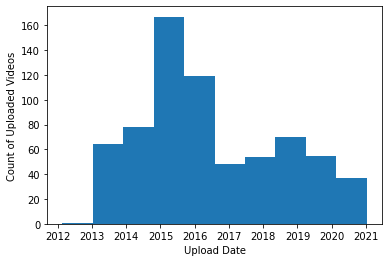

In [30]:
#histogram for upload date
plt.hist(df['Upload Date'])
plt.ylabel("Count of Uploaded Videos")
plt.xlabel("Upload Date")

Text(0, 0.5, 'Video Number')

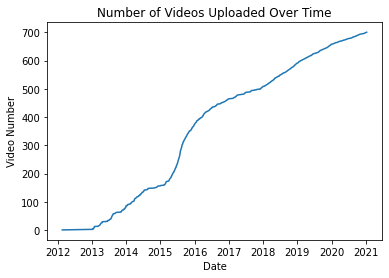

In [31]:
#number of videos uploaded over time
plt.plot(df['Upload Date'], df['Video Number'])
plt.title('Number of Videos Uploaded Over Time')
plt.xlabel("Date")
plt.ylabel("Video Number")

Text(0, 0.5, 'Like to Dislike Ratio')

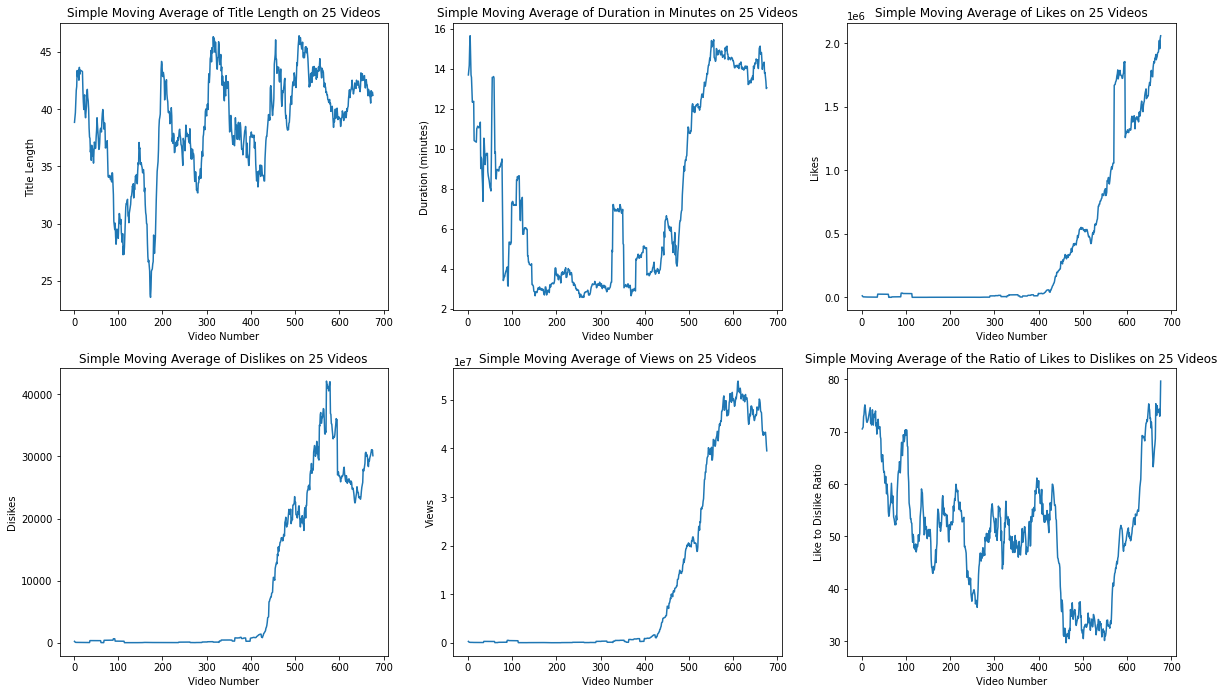

In [32]:
#Create multiple 25 video simple moving average plots 
plt.figure(figsize=(20,18)) #title length
plt.subplot(3, 3, 1)
plt.plot(df['Video Number'], df['Title Length'].rolling(window=25).mean()) 
plt.title('Simple Moving Average of Title Length on 25 Videos')
plt.xlabel("Video Number")
plt.ylabel("Title Length")

plt.subplot(3, 3, 2) #duration (minutes)
plt.plot(df['Video Number'], df['Minutes'].rolling(window=25).mean()) 
plt.title('Simple Moving Average of Duration in Minutes on 25 Videos')
plt.xlabel("Video Number")
plt.ylabel("Duration (minutes)")

plt.subplot(3, 3, 3) #likes
plt.plot(df['Video Number'], df['Likes'].rolling(window=25).mean())
plt.title('Simple Moving Average of Likes on 25 Videos')
plt.xlabel("Video Number")
plt.ylabel("Likes")

plt.subplot(3, 3, 4) #dislikes
plt.plot(df['Video Number'], df['Dislikes'].rolling(window=25).mean())
plt.title('Simple Moving Average of Dislikes on 25 Videos')
plt.xlabel("Video Number")
plt.ylabel("Disikes")

plt.subplot(3, 3, 5) #views
plt.plot(df['Video Number'], df['Views'].rolling(window=25).mean())
plt.title('Simple Moving Average of Views on 25 Videos')
plt.xlabel("Video Number")
plt.ylabel("Views")

plt.subplot(3, 3, 6) #like to dislike ratio
plt.plot(df['Video Number'], df['Like to Dislike Ratio'].rolling(window=25).mean())
plt.title('Simple Moving Average of the Ratio of Likes to Dislikes on 25 Videos')
plt.xlabel("Video Number")
plt.ylabel("Like to Dislike Ratio")

As we can see views and likes have spiked within the last couple hundred videos. Around 450-550 videos in, we can see that like to dislike ratio shot down to hover around 30, but since then has shot back up. It would be interesting to see why people disliked those videos so much relative to the number of likes. It is also worth noting that the channel started out making >10 minute long videos, but decreased down to mostly 2-4 minute videos until sharply shooting back up around video 500

In [33]:
import seaborn as sns

Text(0, 0.5, 'Counts')

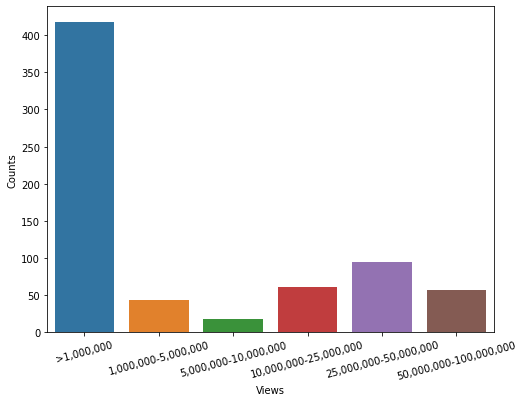

In [34]:
#bar plot for binned view counts
plt.figure(figsize=(8,6))
sns.barplot(x=['>1,000,000', '1,000,000-5,000,000', '5,000,000-10,000,000', '10,000,000-25,000,000', '25,000,000-50,000,000', '50,000,000-100,000,000'], y=df['Views'].value_counts(bins=[0, 1000000, 5000000, 10000000, 25000000, 50000000, 100000000]).sort_index())
#print(df['Views'].value_counts(bins=[0, 1000000, 5000000, 10000000, 25000000, 50000000, 100000000]).sort_index())
plt.xticks(rotation=15)
plt.xlabel('Views')
plt.ylabel('Counts')

Text(0, 0.5, 'Count')

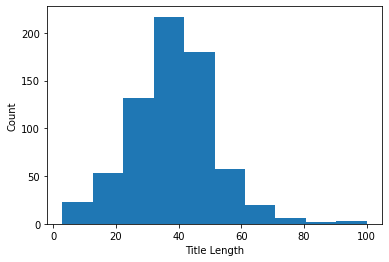

In [35]:
#histogram for title length
plt.hist(df['Title Length'])
plt.xlabel("Title Length")
plt.ylabel("Count")

We can see that title length is roughly normal, centered around 40

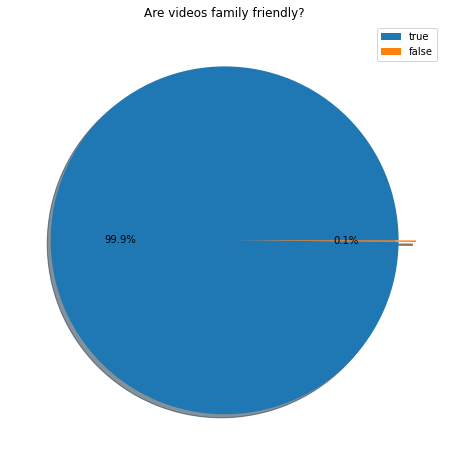

In [36]:
#pie chart for family friendly
plt.figure(figsize=(12,8))
percentages = round(df['Is Family Friendly'].value_counts(normalize=True) * 100 ,2)
plt.pie(percentages, shadow=True, explode=(0, 0.1), labels=['true', 'false'], labeldistance=None, autopct='%1.1f%%' )
plt.title("Are videos family friendly?")
plt.legend()

(-0.001, 10.0]    489
(10.0, 20.0]      171
(20.0, 30.0]       15
(50.0, 60.0]        8
(40.0, 50.0]        6
(30.0, 40.0]        4
Name: Minutes, dtype: int64


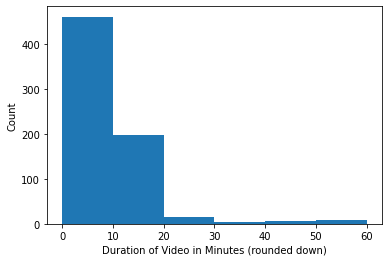

In [37]:
plt.hist(df['Minutes'], bins=[0, 10, 20, 30, 40, 50, 60])
plt.xlabel("Duration of Video in Minutes (rounded down)")
plt.ylabel("Count")
print(df['Minutes'].value_counts(bins=[0, 10, 20, 30, 40, 50, 60]))

In [38]:
percentages = str(round(df['Category'].value_counts(normalize=True) * 100 ,2))
print("Percent of Videos in Each Category")
print(percentages)

Percent of Videos in Each Category
Entertainment    55.27
Gaming           44.01
Comedy            0.58
Howto & Style     0.14
Name: Category, dtype: float64


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

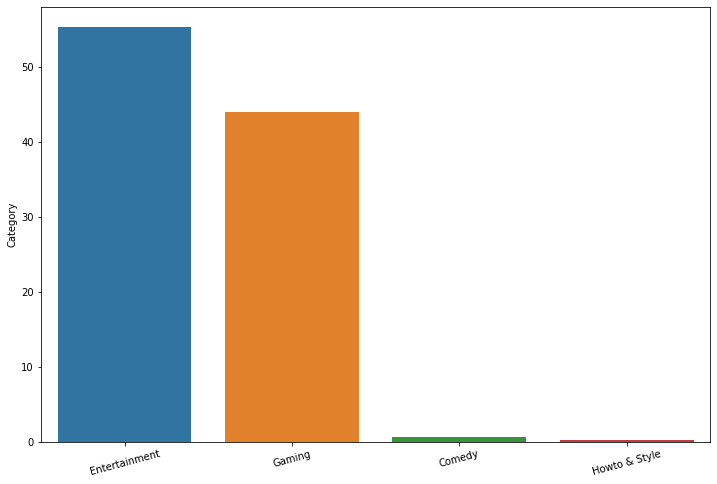

In [39]:
#overall bar plot for category
plt.figure(figsize=(12,8))
sns.barplot(x=df.Category.unique(), y=round(df['Category'].value_counts(normalize=True) * 100 ,2))
plt.xticks(rotation=15)

Since the channel appears to have gone through some shifts in content uploaded throughout its lifespan, I wanted to see what the breakdown for video categories is for each year

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


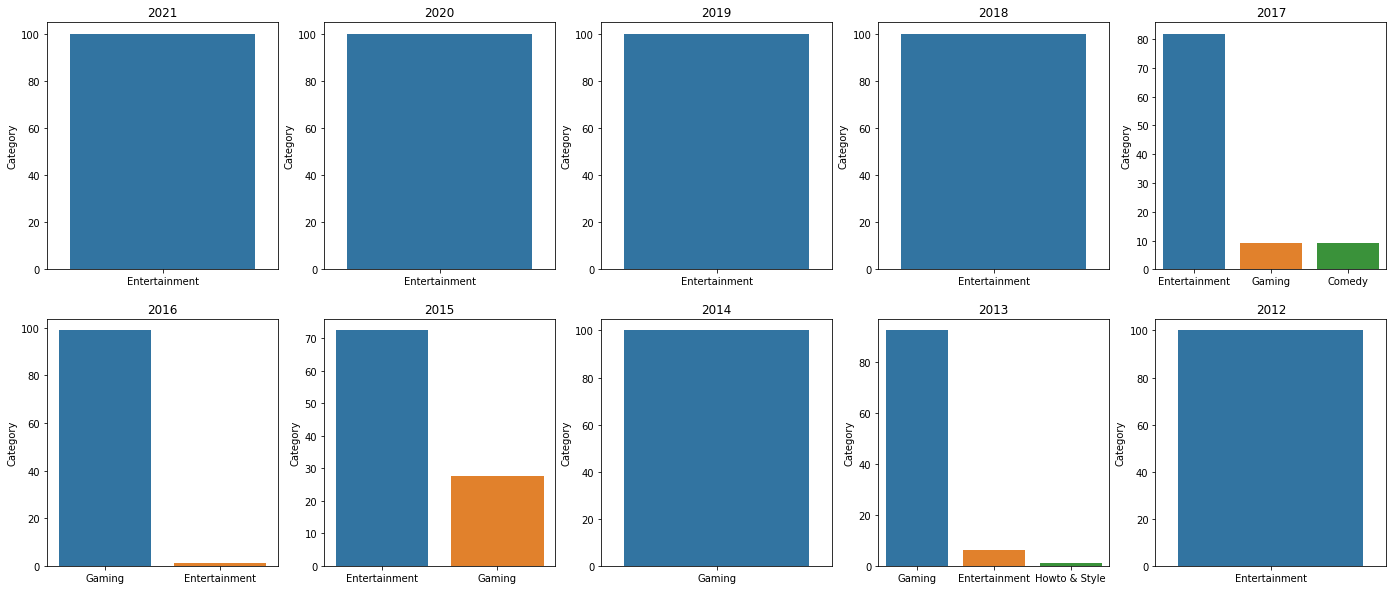

In [40]:
#bar plot for category for each year the channel has uploaded videos
plt.figure(figsize=(24,10)) #title length
plt.subplot(2, 5, 1)
i = 1

for y in df['Upload Date'].dt.year.unique():
  df_new = df[df['Upload Date'].dt.year == y]
  plt.subplot(2, 5, i)
  plt.title(str(y))
  sns.barplot(x=df_new.Category.unique(), y=round(df_new['Category'].value_counts(normalize=True) * 100 ,2))
  i = i + 1

It appears that the channel has, very generally speaking, undergone a transition from gaming content to entertainment content, starting around 2017. Since then, the channel's content has been exclusively entertainment

I also thought it would be interesting to see what type of content has attracted the most viewers and has received the most support

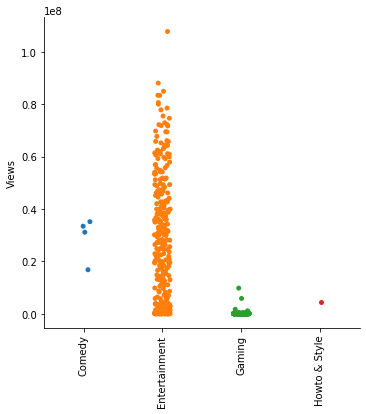

In [41]:
#category plot for views
p = sns.catplot(x=sorted(df.Category), y="Views",
                data=df)
p.set_xticklabels(rotation=90)

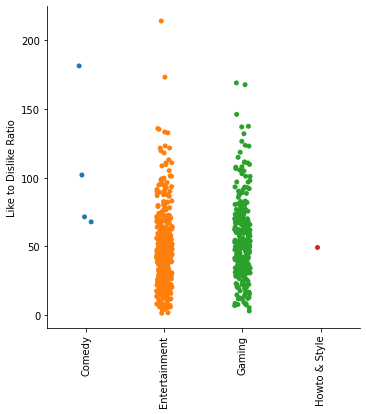

In [42]:
#category plot for like to dislike ratio
p = sns.catplot(x=sorted(df.Category), y="Like to Dislike Ratio",
                data=df)
p.set_xticklabels(rotation=90)

It seems that entertainment videos have brought the most views out of any category by far, but entertainment and gaming videos appear to have very similar support according to the like to dislike ratio distributions. It is also interesting to see that while very few comedy videos have been uploaded, they have recieved a relatively high amount of views and support. However, this may be because the comedy videos were uploaded only in 2017, when the channel was already bringing in a good amount of views and had a good amount of support

In [43]:
print("min title length:", df['Title Length'].min(), "\nmax title length:", df['Title Length'].max())

min title length: 3 
max title length: 100


In [44]:
df_copy = df
df_copy['Title Length Binned'] = pd.cut(df_copy['Title Length'], bins=[0, 10,20,30,40,50,60,70,80,90,100])

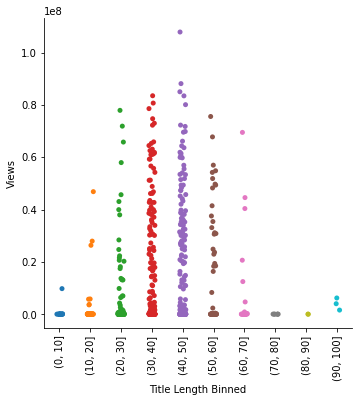

In [45]:
p = sns.catplot(x=df_copy['Title Length Binned'], y="Views",
                data=df_copy)
p.set_xticklabels(rotation=90)

It appears that very long and very short titles don't bring in as many views as titles in the middle range of length (other things equal, of course)

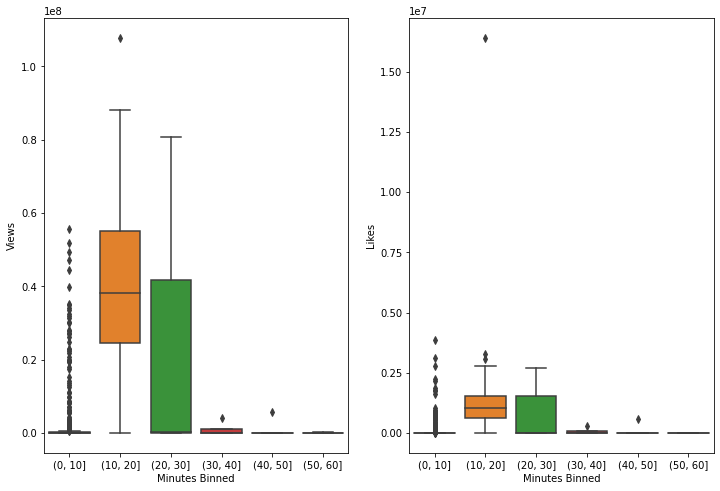

In [46]:
#boxplot for views and likes for each minute bucket 
fig, axs = plt.subplots(ncols=2, figsize=(12,8))
df_copy['Minutes Binned'] = pd.cut(df_copy['Minutes'], bins=[0,10,20,30,40,50,60])
sns.boxplot(x=df_copy['Minutes Binned'], y="Views",
                data=df_copy, ax=axs[0])
sns.boxplot(x=df_copy['Minutes Binned'], y="Likes",
                data=df_copy, ax=axs[1])

It appears that videos from 10-30 minutes long generally perform better than other lengths